In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [19]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, test_size=0.2, random_state=2022
)

In [34]:
dt = DecisionTreeClassifier(random_state=156)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

- 모델 시각화

In [21]:
from sklearn.tree import export_graphviz
export_graphviz(
    dt, out_file='tree.dot',
    feature_names=iris.feature_names, class_names=iris.target_names,
    impurity=True, filled=True
)

In [ ]:
import graphviz

with open('tree.dot') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

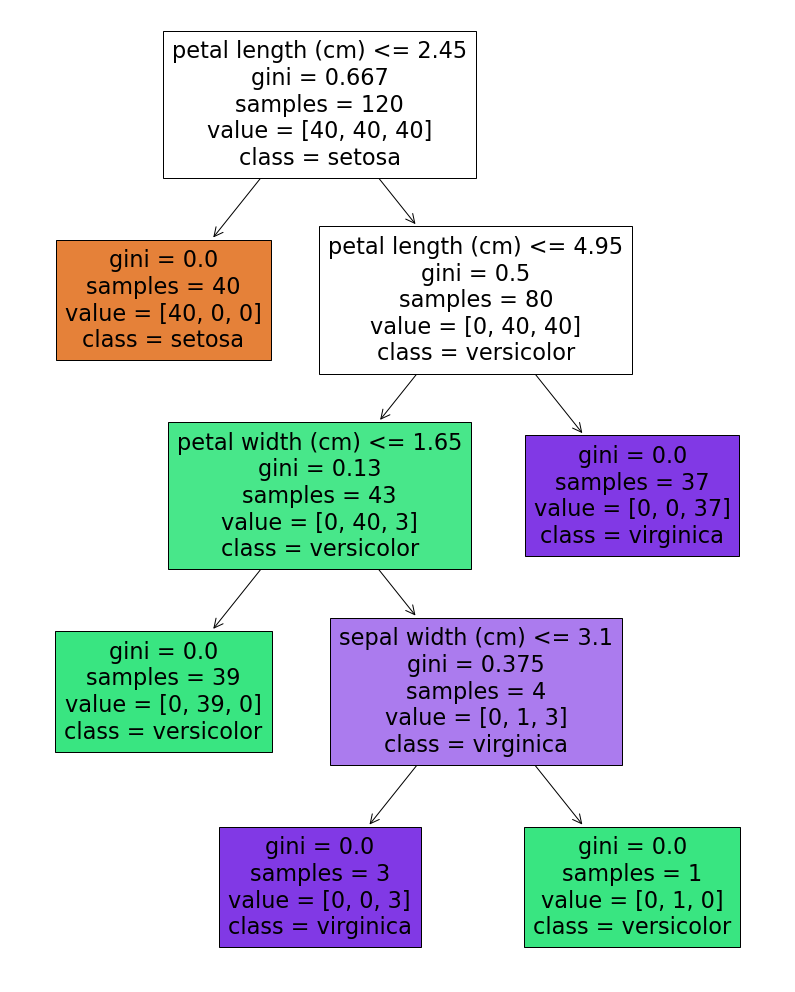

In [46]:
%matplotlib inline
plt.figure(figsize=(14, 18))
plot_tree(dt, feature_names=iris.feature_names, class_names = iris.target_names, filled=True)
plt.show()

- 제약조건: max_depth = 3

In [36]:
dt_2 = DecisionTreeClassifier(max_depth=3, random_state=156)
dt_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

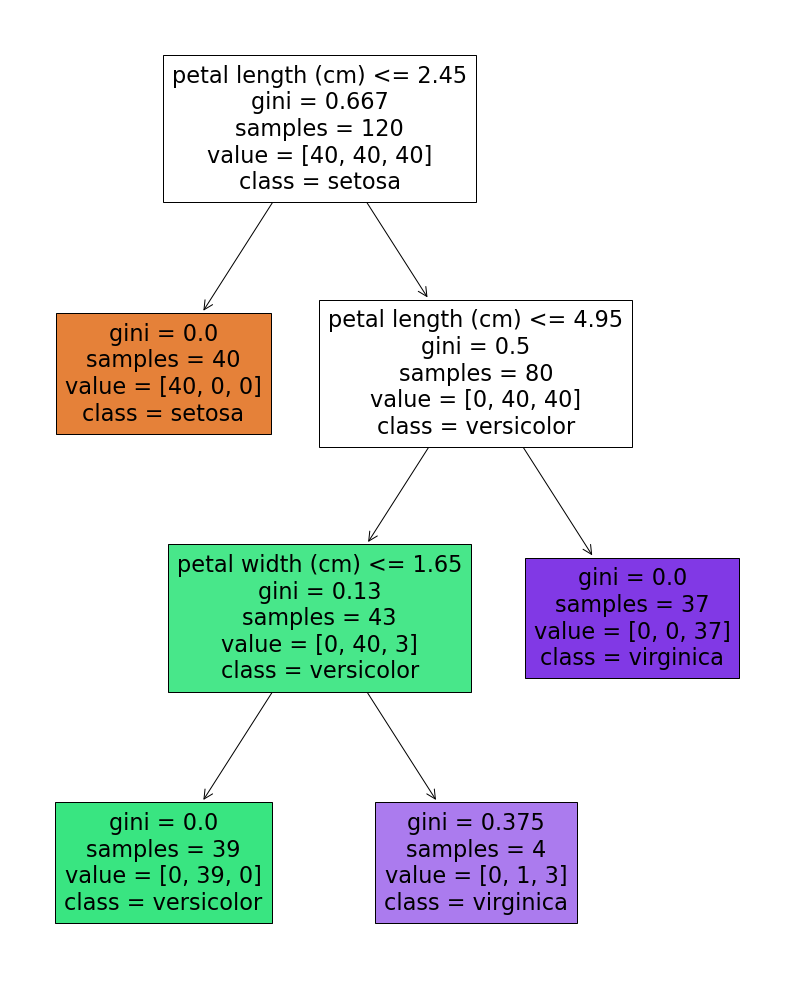

In [45]:
%matplotlib inline
plt.figure(figsize=(14, 18))
plot_tree(dt_2, feature_names=iris.feature_names, class_names = iris.target_names, filled=True)
plt.show()

In [38]:
dt_3 = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dt_3.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=156)

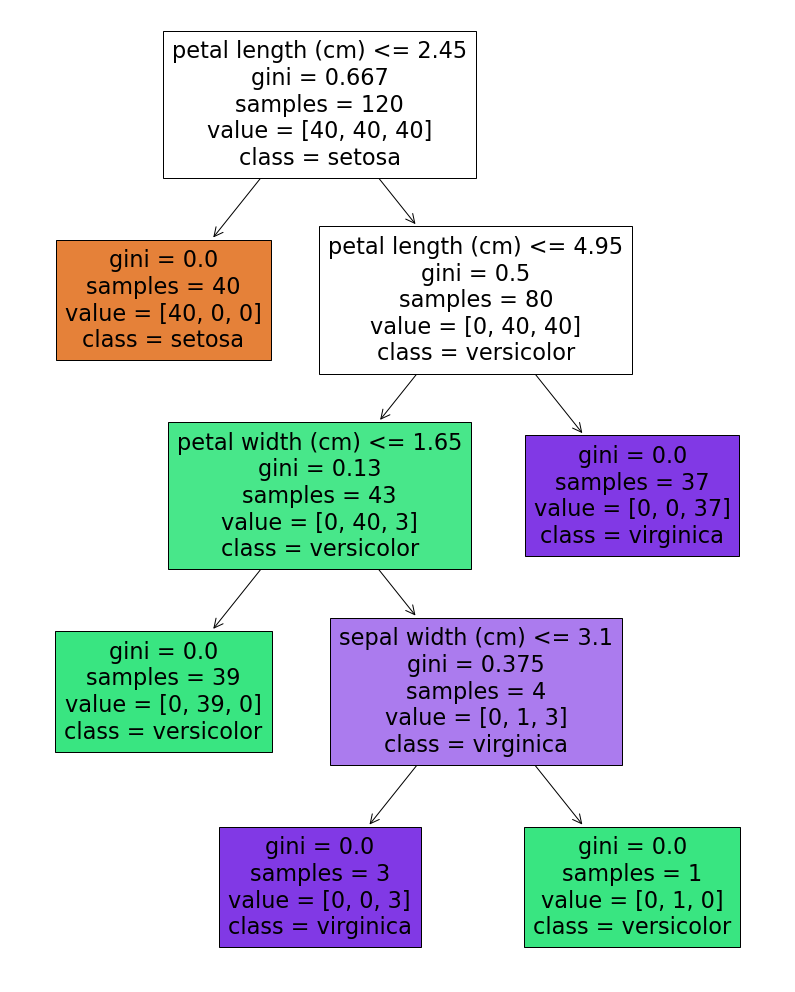

In [44]:
%matplotlib inline
plt.figure(figsize=(14, 18))
plot_tree(dt_3, feature_names=iris.feature_names, class_names = iris.target_names, filled=True)
plt.show()

In [40]:
dt_4 = DecisionTreeClassifier(min_samples_leaf=2, random_state=156)
dt_4.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2, random_state=156)

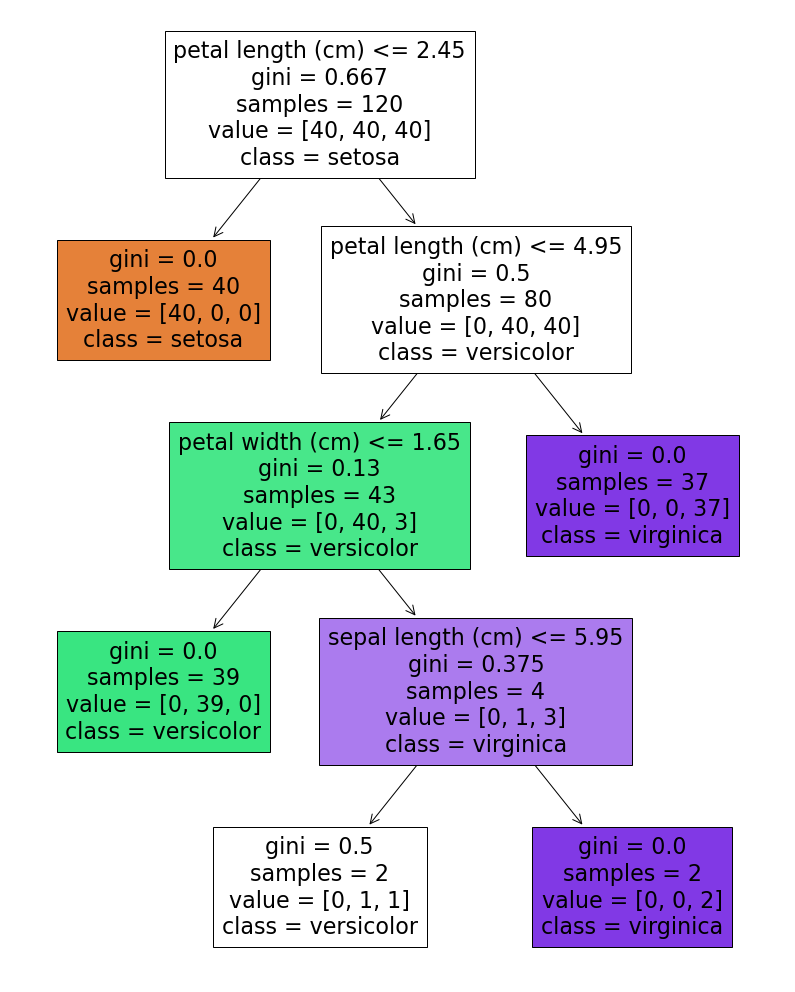

In [43]:
%matplotlib inline
plt.figure(figsize=(14, 18))
plot_tree(dt_4, feature_names=iris.feature_names, class_names = iris.target_names, filled=True)
plt.show()

- 모델 간 비교

In [42]:
dt.score(X_test, y_test), dt_2.score(X_test, y_test), dt_3.score(X_test, y_test), dt_4.score(X_test, y_test)

(0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9)

#### 학습된 모델이 제공하는 정보
- Feature Importance

In [47]:
dt.feature_importances_

array([0.        , 0.01875   , 0.93023256, 0.05101744])

In [48]:
dt_2.feature_importances_

array([0.       , 0.       , 0.9480077, 0.0519923])

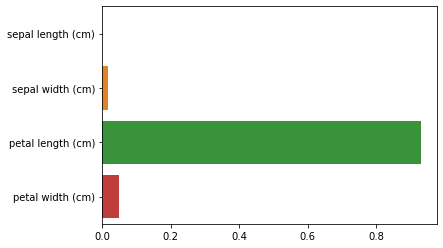

In [49]:
import seaborn as sns
sns.barplot(x=dt.feature_importances_, y=iris.feature_names)
plt.show()